In [9]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [10]:
from src.data import load_raw, RAW_FILE, split_and_save, PROCESSED_DIR
# from src.preprocess import preprocess_pipeline

In [11]:
df = load_raw()
print(df.shape)

(7043, 21)


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.info()
df.describe(include='all').T
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Churn distribution')

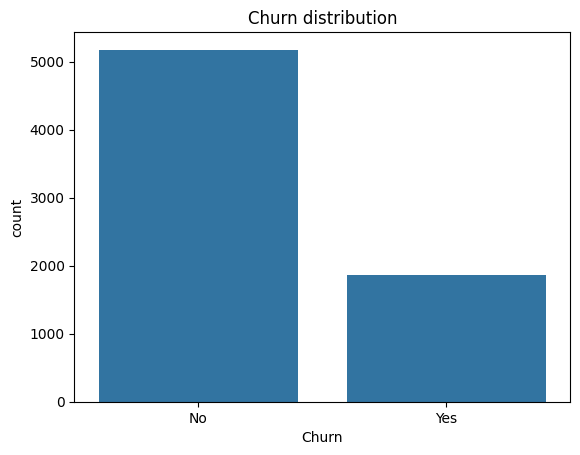

In [17]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)
sns.countplot(x='Churn', data=df)
plt.title('Churn distribution')

In [18]:
df['TotalCharges'].head(10)
df[df['TotalCharges'].str.strip()==""].shape 

(11, 21)

Text(0.5, 1.0, 'MonthlyCharges')

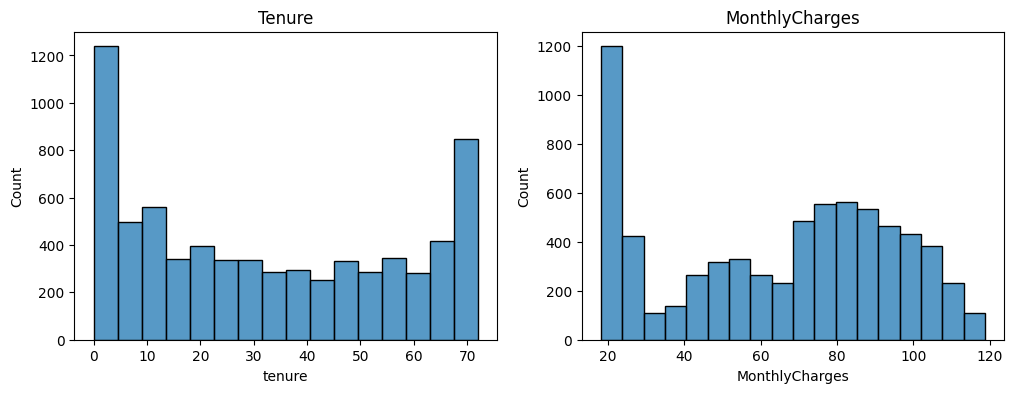

In [19]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['tenure'].dropna(), ax=axs[0])
axs[0].set_title('Tenure')
sns.histplot(pd.to_numeric(df['MonthlyCharges'], errors='coerce').dropna(), ax=axs[1])
axs[1].set_title('MonthlyCharges')

In [20]:
num_cols = ['tenure','MonthlyCharges']
tmp = df[num_cols + ['Churn']].copy()
tmp['MonthlyCharges'] = pd.to_numeric(tmp['MonthlyCharges'], errors='coerce')
tmp.groupby('Churn').mean().T

Churn,No,Yes
tenure,37.569965,17.979133
MonthlyCharges,61.265124,74.441332


Text(0.5, 1.0, 'InternetService vs Churn')

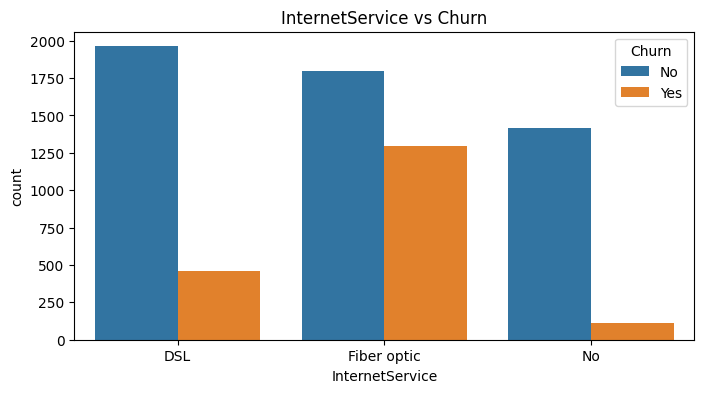

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('InternetService vs Churn')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

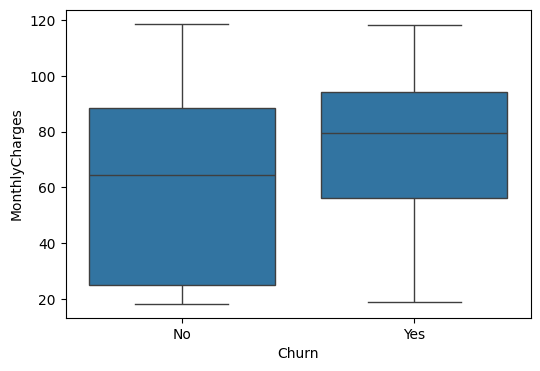

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

np.int64(0)

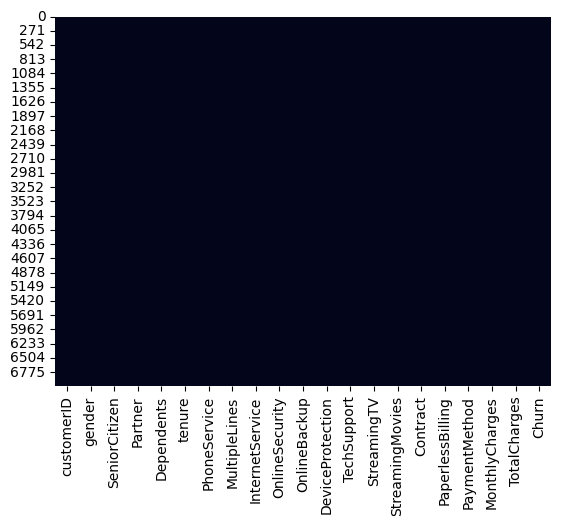

In [23]:
sns.heatmap(df.isna(), cbar=False)
df.duplicated().sum()